# Numerical Simulation Program

In [103]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.special import factorial
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.stats import chi2
import scipy.integrate as integrate

# For plotting
import matplotlib.pyplot as plt

from scipy.fft import fft
from scipy.interpolate import interp1d

## Simulation of Physical Pendulum
Using ODE solver provided by the `scipy.integrate.odeint` to simulate the equation of motion of physical pendulum.
What we found is that the larger angle you enter (i.e. larger `theta_init`), you will get a larger period that can be seen from the plot.

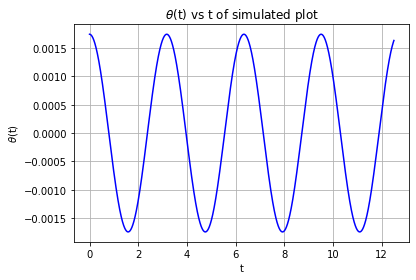

In [107]:
# theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
# theta'(t) = thetadot(t)
# theta''(t) = -b*thetadot(t) - c*sin(theta(t))

# -----------------------------------------------------------------------------------------------
# input
# -----------------------------------------------------------------------------------------------

l = 45
k = 28.888
g = 980.7
theta_init = 0.1 * np.pi/180 # small angle
#theta_init = 170 * np.pi/180 # larger angle, wave distorted
gamma = 0.0

c = np.sqrt(g * l / (k**2 + l**2) )

def pend(y, t, b, c):
    theta, thetadot = y
    dydt = [thetadot, -gamma*thetadot - c*np.sin(theta)]
    return dydt

N = 10000 # Number of sample points
T = 1.0 / 800.0 # sample spacing

y0 = [theta_init, 0.0]
t = np.linspace(0, N * T, N)
sol = integrate.odeint(pend, y0, t, args=(gamma, c))

theta = sol[:, 0]

# invf = interp1d(theta, t,)
# print(invf(0))

plt.plot(t, theta, 'b', label='theta(t)')
plt.xlabel('t')
plt.ylabel(r'$\theta$(t)')
plt.title(r'$\theta$(t) vs t of simulated plot')
plt.grid()
plt.show()

Attempted way to find the period using `scipy.fft` but seems not able to recover the precise value of the peiod. Future work will be to continue working on this code to find the period. Something is wrong in this code. Note that this is not definitely a scope of the PHYS233, so please not deduct a mark for this.

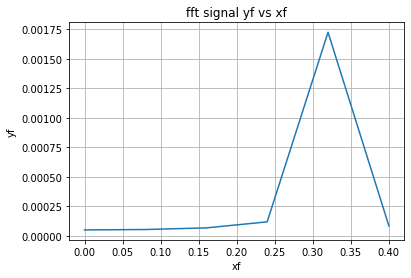

T =  3.125 s


In [106]:
#Referenced: https://stackoverflow.com/questions/61508396/finding-periods-of-a-plot

# x = np.linspace(0.0, N * T, N)
# y = np.sin(50.0 * 2.0 * np.pi * x)
x = t
y = theta
yf = fft(y)
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)

xf = xf[0:6]
yf = yf[0:6]

plt.plot(xf, 2.0 / N * np.abs(yf[0:N // 2]))
plt.grid()
plt.xlabel("xf")
plt.ylabel("yf")
plt.title("fft signal yf vs xf")
plt.show()
print("T = ", 1/0.32, "s")